In [1]:
import pandas as pd
import numpy as np
import random
from dataset import get_datasets

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
from tqdm.auto import tqdm
tqdm.pandas()

/Users/mohnishdevadiga/anaconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
df = get_datasets(shuffle=True)
df

100%|██████████| 83/83 [00:07<00:00, 11.81it/s]


,title,text,fake
0,It’s Not Over Yet: “They May Be Trying To Stea...,\nYou didn’t think she’d go down without a fig...,1
1,,Napster offers rented music to go\n\nMusic dow...,0
2,Forget the Trump-Clinton Charade: It’s Time to...,Email \nWho will be the winners and the losers...,1
3,Contenders for senior jobs in Trump's administ...,(Reuters) - The following are people mentioned...,0
4,Brussels attack victim’s wife sues Twitter for...,The wife of a New York man who died is suing...,0
...,...,...,...
209362,Eleanor Roosevelt’s ‘mistress’ died heartbroke...,"They called each other “darling,” “dear one” a...",0
209363,"No, This Video Of Putin Singing ""Creep"" Is No...","’ On March 21, a YouTube channel published a ...",0
209364,Activist investor mad at iHeart’s debt maneuve...,Radio giant iHeartMedia’s latest debt maneuver...,0
209365,"After Mastectomies, an Unexpected Blow: Numb N...",After learning she had a high genetic risk for...,0


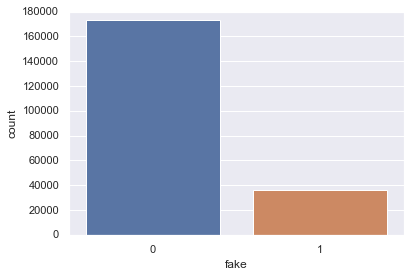

In [5]:
plot = sns.countplot(x="fake", data=df)

We see that there are more 0's i.e. Facts than 1's i.e. Fake so we randomly delete Facts to normalize them

FACT: 36180 FAKE:36480 Difference:300


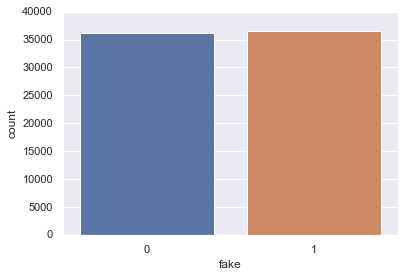

In [6]:
def normalize(df,difference=300):
    df_list = [df[df['fake']==0],df[df['fake']==1]] # [fact,fake]
    lst = [len(df_list[0]),len(df_list[1])]
    if not bool(lst.index(min(lst))):
        """ if fake is larger than swap """
        df_list[0], df_list[1] = df_list[1], df_list[0]
    size = len(df_list[0]) - len(df_list[1]) + difference
    to_delete = random.sample(range(0, len(df_list[0])), size)
    df_list[0] = df_list[0].drop(df_list[0].index[to_delete])
    print("FACT: {} FAKE:{} Difference:{}".format(len(df_list[0]),len(df_list[1]),len(df_list[1])-len(df_list[0])))
    return df_list[0].append(df_list[1], ignore_index=True).sample(frac=1)
    
plot = sns.countplot(x="fake", data=normalize(df))

On further analysis we see that there are many Titles missing

In [7]:
df = normalize(df)
df[df['title']== ' '].head()

FACT: 36180 FAKE:36480 Difference:300


,title,text,fake
15618,,"Simon Rubinsohn, chief economist at Gerrard, s...",0
25046,,"Robinson had said he was ""livid"" about Kaplan'...",0
21567,,’Killer Robots By Air … ’ ’ … And By S...,0
11025,,It also says there should be more state fundin...,0
21340,,"I am confident and optimistic,"" said Thanou.""W...",0


Make a new Column 'news' by concating 'title' and 'text' columns

In [8]:
df = df.replace(np.nan, '', regex=True)
df['news'] = df['title'].str.cat(df['text'],sep=" ")
df[df['title']== ' '].head()

,title,text,fake,news
15618,,"Simon Rubinsohn, chief economist at Gerrard, s...",0,"Simon Rubinsohn, chief economist at Gerrard,..."
25046,,"Robinson had said he was ""livid"" about Kaplan'...",0,"Robinson had said he was ""livid"" about Kapla..."
21567,,’Killer Robots By Air … ’ ’ … And By S...,0,’Killer Robots By Air … ’ ’ … And By...
11025,,It also says there should be more state fundin...,0,It also says there should be more state fund...
21340,,"I am confident and optimistic,"" said Thanou.""W...",0,"I am confident and optimistic,"" said Thanou...."


In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from string import punctuation
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
stop.update(list(punctuation))

Cleaning text to remove url, html tags, stopwords, numbers then lemmatizing them

In [10]:
def text_clean(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = " ".join(x for x in word_tokenize(str(text)) if x.strip().lower() not in stop)
    text = re.sub(r'\d+', '', text)
    text = " ".join(lemmatizer.lemmatize(x.lower()) for x in text.split())
    return(text)

text_clean("How are you i am a good <ht> asdsad\n <\hr> !! https://abc.com person 'sd q2e12 y7iqweq8768i34q2 'ns C 100kg")

"good asdsad person 'sd qe yiqweqiq 'ns c kg"

In [11]:
df_test = df
df_test = df_test.replace(np.nan, '', regex=True)
df_test.head()

,title,text,fake,news
51201,Trump’s Response To USS John S. McCain Collis...,It s common knowledge that Donald Trump is a s...,1,Trump’s Response To USS John S. McCain Collis...
68880,"Donald Trump Whines, Swears And Talks Cocktai...",It s tough sometimes to imagine that Donald Tr...,1,"Donald Trump Whines, Swears And Talks Cocktai..."
42575,Will the next US president be a psycho lesbian...,By Tom Leonard with pictures and captions adde...,1,Will the next US president be a psycho lesbian...
51151,REPORTER INTERVIEWING TRUMP Refers To CA Terro...,"Well, I don t know. When you have pipe bombs ...",1,REPORTER INTERVIEWING TRUMP Refers To CA Terro...
48069,CNN REPORTER: Victims at Las Vegas Concert Wer...,CNN reporter Jeff Zeleny said on Monday that c...,1,CNN REPORTER: Victims at Las Vegas Concert Wer...


In [12]:
df_test['news'] = df_test['news'].progress_apply(text_clean)
df_test.head()

,title,text,fake,news
51201,Trump’s Response To USS John S. McCain Collis...,It s common knowledge that Donald Trump is a s...,1,trump ’ response us john s. mccain collision h...
68880,"Donald Trump Whines, Swears And Talks Cocktai...",It s tough sometimes to imagine that Donald Tr...,1,donald trump whine swears talk cocktail party ...
42575,Will the next US president be a psycho lesbian...,By Tom Leonard with pictures and captions adde...,1,next u president psycho lesbian plus breaking ...
51151,REPORTER INTERVIEWING TRUMP Refers To CA Terro...,"Well, I don t know. When you have pipe bombs ...",1,reporter interviewing trump refers ca terroris...
48069,CNN REPORTER: Victims at Las Vegas Concert Wer...,CNN reporter Jeff Zeleny said on Monday that c...,1,cnn reporter victim la vega concert likely tru...
